<a href="https://colab.research.google.com/github/D6342/D1978/blob/main/P6_Applying_the_Autoencoder_algorithms_for_encoding_real_world_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
from platform import python_version

print(python_version())

3.11.12


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import tensorflow.keras.backend as K

#from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, utils
from tensorflow.keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    imgs = np.expand_dims(imgs, -1)
    return imgs

In [ ]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

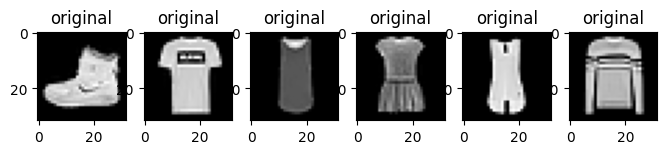

In [ ]:
n = 6
plt.figure(figsize=(8, 4))
for i in range(n):
  # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.title("original")
    plt.gray()

In [ ]:
encoder_input = layers.Input(shape=(32, 32, 1), name = "encoder_input")
x = layers.Conv2D(32, (3, 3), strides = 2, activation = 'relu', padding="same")(encoder_input)
x = layers.Conv2D(64, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = layers.Flatten()(x)
encoder_output = layers.Dense(2, name="encoder_output")(x)
encoder = Model(encoder_input, encoder_output)

In [ ]:
decoder_input = layers.Input(shape=(2,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation = 'relu', padding="same")(x)
decoder_output = layers.Conv2D(1,(3, 3),strides = 1,activation="sigmoid",padding="same",name="decoder_output")(x)
decoder = Model(decoder_input, decoder_output)

In [ ]:
autoencoder = Model(encoder_input, decoder(encoder_output))

In [ ]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
autoencoder.fit(
x_train,
x_train,
epochs=5,
batch_size=100,
shuffle=True,
validation_data=(x_test, x_test),
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 204s 333ms/step - loss: 0.3571 - val_loss: 0.2632
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 195s 325ms/step - loss: 0.2605 - val_loss: 0.2580
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 197s 316ms/step - loss: 0.2558 - val_loss: 0.2553
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 204s 319ms/step - loss: 0.2535 - val_loss: 0.2545
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 199s 315ms/step - loss: 0.2517 - val_loss: 0.2524


In [ ]:
example_images = x_test[:5000]

In [ ]:
predictions = autoencoder.predict(example_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


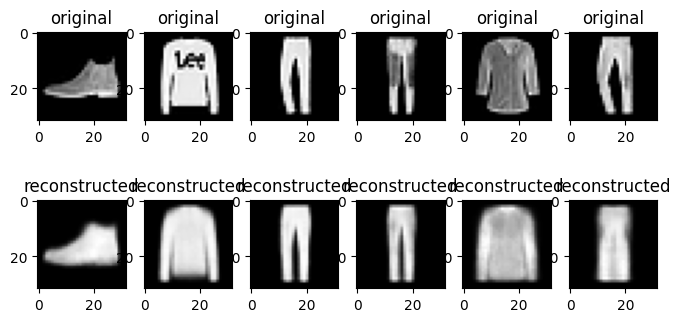

In [ ]:
n = 6
plt.figure(figsize=(8, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i])
    plt.title("reconstructed")
    plt.gray()

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


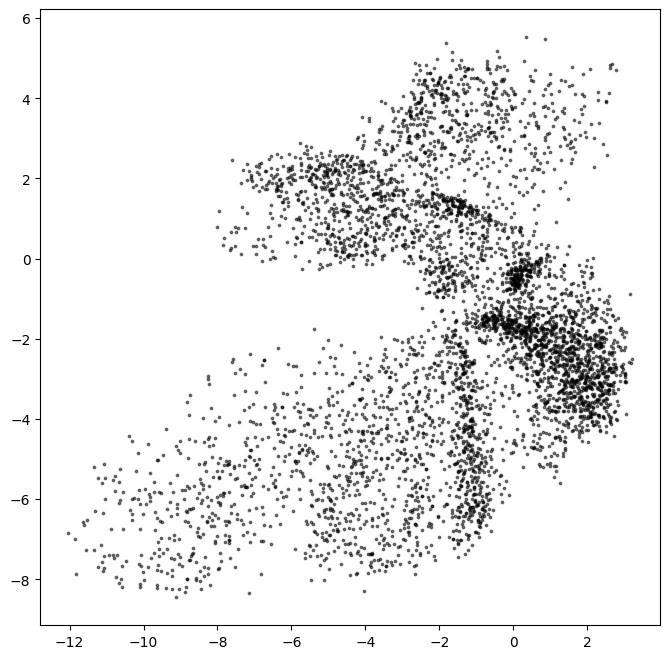

In [ ]:
embeddings = encoder.predict(example_images)
plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

In [ ]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(18, 2))
reconstructions = decoder.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


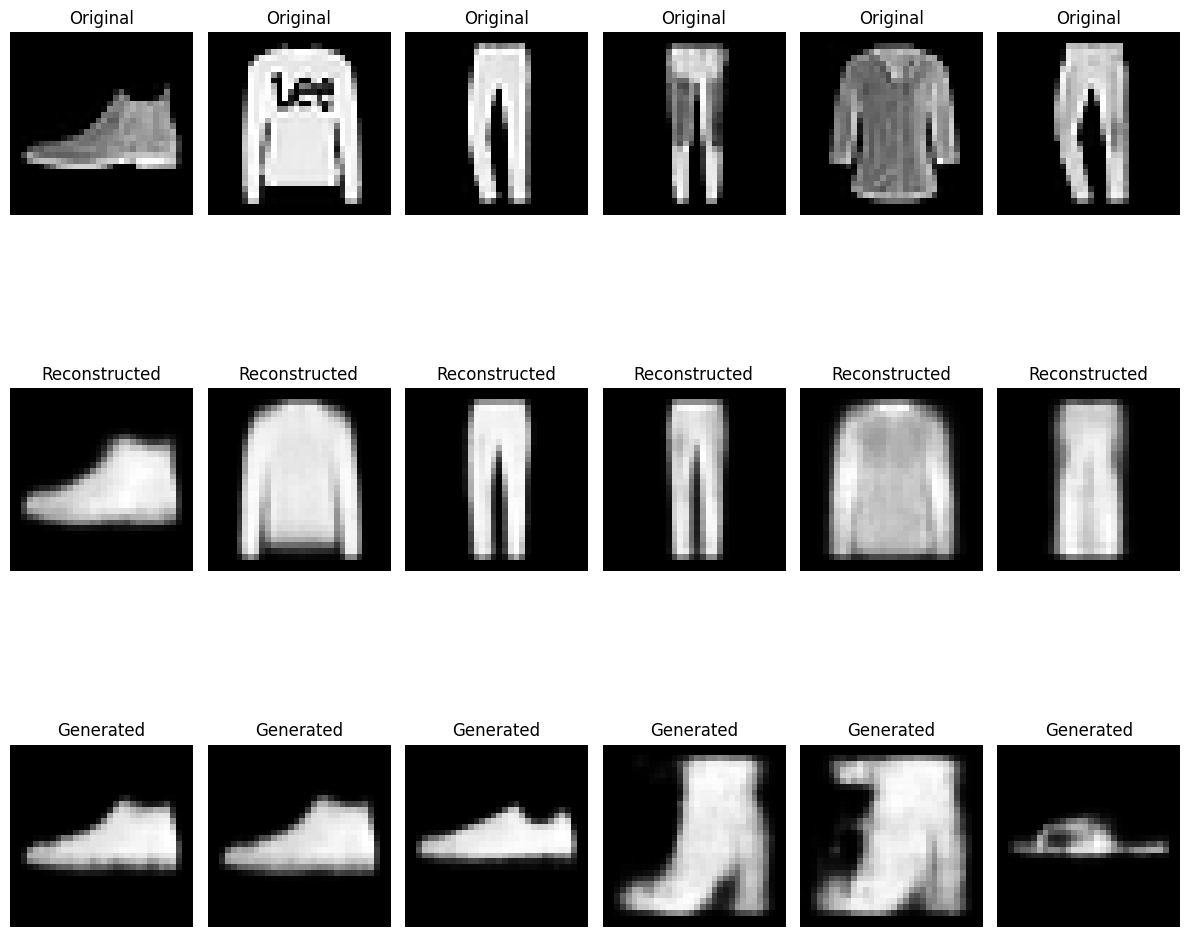

In [ ]:
import matplotlib.pyplot as plt

# Assuming x_test, predictions, and reconstructions are defined and are numpy arrays
n = 6  # Number of images to display
plt.figure(figsize=(12, 12))

# Check if we have enough images
if len(x_test) < n or len(predictions) < n or len(reconstructions) < n:
    raise ValueError("Not enough images to display. Ensure x_test, predictions, and reconstructions have at least n images.")

for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)  # 3 rows (original, reconstructed, generated)
    plt.imshow(x_test[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title("Original")
    ax.axis("off")

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(predictions[i], cmap='gray')
    plt.title("Reconstructed")
    ax.axis("off")

    # Display generated images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructions[i], cmap='gray')
    plt.title("Generated")
    ax.axis("off")

plt.tight_layout()
plt.show()